## importing required libraries/packages

In [2]:

import numpy as np
import pandas as pd
import os
import operator
from string import punctuation
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support as score

In [3]:
#stop words
stop_words=["a","the","able","about","data", "about", "above", "above", "across", "after", "afterwards", "again", 
            "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst",
            "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", 
            "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", 
            "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", 
            "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", 
            "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", 
            "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything",
            "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", 
            "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", 
            "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", 
            "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", 
            "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", 
            "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", 
            "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", 
            "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", 
            "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves",
            "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", 
            "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six",
            "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", 
            "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", 
            "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", 
            "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too",
            "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", 
            "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", 
            "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", 
            "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your",
            "yours", "yourself", "yourselves", "the"]

## storing special_characters and punctuation marks

In [4]:

specialChar_and_digits = set(punctuation)
for i in range(0,10):
    specialChar_and_digits.add(str(i))
print(specialChar_and_digits)

{'6', '!', '0', '+', ']', "'", '`', '^', '*', '.', '$', ',', '5', ')', '8', '}', '{', '3', '=', '(', '&', '/', '<', '@', '?', '|', ';', '_', ':', '"', '-', '9', '~', '%', '#', '[', '\\', '7', '1', '>', '4', '2'}


### Creating Word Dictionary (Vocabulary)

In [6]:
# storing the all the classe names in a list from the given folder
all_classes = os.listdir("20_newsgroups")

# creating the word dictionary
word_dictionary = {}
"""
DICTIONARY :
    Keys   : words
    Values : count of word
"""

# using count for checking progress during runtime
count = 1

# Iterating through all classes
for class_ in all_classes:
    # storing the all documents in a list for a particular class
    all_docs = os.listdir("20_newsgroups"+"/"+class_)
    
    # traversing through all documents
    for docs in all_docs:
        
        # getting the base path which is common for all documents of a particular class
        path = "20_newsgroups"+"/"+class_+"/"+docs
        
        # opening the particular document as file object
        with open(path, encoding = "latin-1") as file_obj:
            
            # reading the document data
            file_data = file_obj.read()
            
            # stroing each words in a list , used re to remove the whitespaces 
            tokens = re.compile('\w+').findall(file_data)
            
            # traversing through all words and updating the value in dictionary if already exist otherwise will add to it
            for word in tokens:
                
                # checking if the word in a stop_word or not, is aphbetic and the lenth should be > 3 to avoid words like i, me etc
                if (word.lower() not in stop_words) and (word.lower().isalpha()) and (len(word.lower())>3):
                    
                    # getting the value of word from dictionary and increasing its count by 1 if word does not exists in dictionart then adding it with count 1
                    word_dictionary[word.lower()] = word_dictionary.get(word.lower(),0) + 1 
    # using print statement to check the progress during runtime
    print(count, "Class done")
    count+=1
'''for key in word_dictionary.copy():
    for char in specialChar_and_digits:
        if char in key:
            word_dictionary.pop(key)
            break '''     
print(len(word_dictionary))
word_dictionary

1 Class done
2 Class done
3 Class done
4 Class done
5 Class done
6 Class done
7 Class done
8 Class done
9 Class done
10 Class done
11 Class done
12 Class done
13 Class done
14 Class done
15 Class done
16 Class done
17 Class done
18 Class done
19 Class done
20 Class done
96187


{'xref': 6064,
 'cantaloupe': 26048,
 'atheism': 2563,
 'moderated': 58,
 'news': 34309,
 'answers': 913,
 'path': 20369,
 'crabapple': 6235,
 'andrew': 4458,
 'ohio': 15887,
 'state': 18842,
 'magnus': 1340,
 'usenet': 8308,
 'cwru': 2732,
 'agate': 1827,
 'spool': 581,
 'uunet': 5369,
 'pipex': 759,
 'ibmpcug': 109,
 'mantis': 625,
 'mathew': 426,
 'newsgroups': 20404,
 'subject': 21589,
 'atheist': 406,
 'resources': 475,
 'summary': 983,
 'books': 950,
 'addresses': 242,
 'music': 481,
 'related': 712,
 'keywords': 1554,
 'fiction': 148,
 'contacts': 100,
 'message': 21954,
 'date': 20787,
 'expires': 161,
 'followup': 1485,
 'distribution': 4753,
 'world': 5354,
 'organization': 19840,
 'consultants': 92,
 'cambridge': 470,
 'approved': 1322,
 'request': 848,
 'supersedes': 50,
 'lines': 20894,
 'archive': 510,
 'modified': 236,
 'december': 201,
 'version': 2616,
 'organizations': 281,
 'freedom': 713,
 'religion': 5351,
 'foundation': 261,
 'darwin': 2403,
 'fish': 129,
 'bumper

## sorting the dictionary in decreasing order of count

In [7]:

word_dictionary = dict(sorted(word_dictionary.items(), key=operator.itemgetter(1),reverse=True))
word_dictionary

{'news': 34309,
 'cantaloupe': 26048,
 'message': 21954,
 'subject': 21589,
 'lines': 20894,
 'date': 20787,
 'newsgroups': 20404,
 'path': 20369,
 'organization': 19840,
 'state': 18842,
 'ohio': 15887,
 'writes': 14686,
 'article': 13435,
 'comp': 13101,
 'references': 12981,
 'talk': 12308,
 'misc': 11892,
 'sender': 11040,
 'howland': 10981,
 'reston': 10946,
 'people': 10364,
 'like': 10350,
 'just': 9978,
 'university': 9958,
 'posting': 9793,
 'nntp': 9377,
 'know': 9173,
 'host': 8934,
 'think': 8315,
 'usenet': 8308,
 'zaphod': 8302,
 'politics': 7869,
 'windows': 7584,
 'does': 7267,
 'time': 7073,
 'rutgers': 7014,
 'harvard': 6923,
 'near': 6868,
 'good': 6308,
 'crabapple': 6235,
 'xref': 6064,
 'europa': 5448,
 'gtefsd': 5429,
 'uunet': 5369,
 'world': 5354,
 'religion': 5351,
 'make': 5191,
 'christian': 5129,
 'right': 4943,
 'rochester': 4851,
 'distribution': 4753,
 'club': 4617,
 'space': 4544,
 'mail': 4511,
 'andrew': 4458,
 'want': 4442,
 'gatech': 4413,
 'magnesi

### Plotting the word frequencies

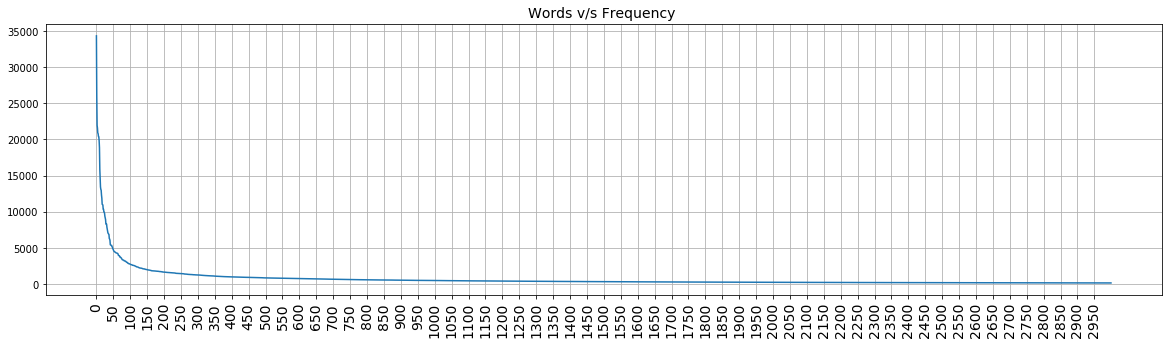

In [9]:
# storing the words ( keys of dictionary) and its frequencies ( values of dictionary) in a array inorder to plot the graph
words = [key for key,val in word_dictionary.items()]
frequencies = [val for key,val in word_dictionary.items()]

# setting the limit to avoid the least frequencies words
lower_limit=0   
upper_limit=3000    

# defining the figure size for better visualization
plt.figure(figsize=(20, 5))

# plotting the line graph
plt.plot(np.arange(len(words))[lower_limit:upper_limit],frequencies[lower_limit:upper_limit])
plt.title("Words v/s Frequency ",size=14)
plt.xticks(np.arange(lower_limit, upper_limit, 50), rotation=90,size=14)
plt.grid()
plt.show()

From the graph we can visualize that the frequencies of words after the index 3000 is almost close to 0. So, we would pick the top 3000 words for building the vocabulary

In [10]:
# picking the top 3000 words for vocabulary
words = words[0:3000]
frequencies = frequencies[0:3000]

In [11]:
print(len(words))

3000


#  Building dataset from the given documents

In [9]:
# dataset is a array to store the datapoints of all documents
dataset = []

# getting all the class names in a list
all_classes = os.listdir("20_newsgroups")

# using count for checking the progress during runtime
class_count = 1

# traversing through each class
for class_ in all_classes:
    # storing the all documents in a list for a particular class
    all_docs = os.listdir("20_newsgroups"+"/"+class_)
    
    # traversing through each documents of a particular class
    for docs in all_docs:
        
        # initializing all the features of a datapoint with 0
        datapoint = [0]*len(words)
        
        # getting the base path which is common for all documents of a particular class
        path = "20_newsgroups"+"/"+class_+"/"+docs
        
        # opening the particular document as file object   
        with open(path, encoding = "latin-1") as file_obj:
            
            # reading the document data
            file_data = file_obj.read()
            
            # stroing each words in a list , used re to remove the whitespaces 
            tokens = re.compile('\w+').findall(file_data)
            
            # traversing through each word in token and checking if it is in vocabulary or not
            for word in tokens:
                word = word.lower()
                
                # if the word is in vocabulary then increasing its count by 1 otherwise continue
                if word in words:
                    datapoint[words.index(word)] = datapoint[words.index(word)] + 1
                    
        # appending the class name to target column of the datapoint to which class it belongs
        datapoint.append(class_)
        
        # adding the datapoint to the dataset
        dataset.append(datapoint)
        
    # using print to check the progress during the runtime
    print(class_count, "Class done")
    class_count+=1
print(len(dataset))

1 Class done
2 Class done
3 Class done
4 Class done
5 Class done
6 Class done
7 Class done
8 Class done
9 Class done
10 Class done
11 Class done
12 Class done
13 Class done
14 Class done
15 Class done
16 Class done
17 Class done
18 Class done
19 Class done
20 Class done
19997


In [10]:
# adding a column to words which will be the target for the particular datapoint
words.append("CLASS")

## Creating a pandas DataFrame for the dataset

In [11]:
# converting dataset array to the pandas DataFrame
data_df = pd.DataFrame(dataset,columns = words, index = None)
data_df.head()

,news,cantaloupe,message,subject,lines,date,newsgroups,path,organization,state,...,albany,northeastern,vram,cacs,clarku,listening,campaign,wearing,ccwf,CLASS
0,4,2,1,1,2,1,1,1,2,2,...,0,0,0,0,0,1,0,0,0,alt.atheism
1,3,2,2,2,1,1,1,1,2,9,...,0,0,0,0,0,0,2,0,0,alt.atheism
2,2,1,1,1,1,2,1,1,1,0,...,0,0,0,0,0,0,0,0,0,alt.atheism
3,1,2,1,1,1,1,1,1,1,3,...,0,0,0,0,0,0,0,0,0,alt.atheism
4,0,2,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,alt.atheism


In [12]:
data_df.describe(include="all")

,news,cantaloupe,message,subject,lines,date,newsgroups,path,organization,state,...,albany,northeastern,vram,cacs,clarku,listening,campaign,wearing,ccwf,CLASS
count,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,...,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,comp.sys.ibm.pc.hardware
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,1.715707,1.302595,1.097865,1.079612,1.044857,1.039506,1.020353,1.018603,0.992149,0.942241,...,0.008501,0.008501,0.008501,0.008501,0.008501,0.008451,0.008451,0.008451,0.008451,NaN
std,1.480837,0.459393,0.554378,0.779541,0.362166,0.316006,0.230535,0.280838,0.309528,1.302672,...,0.202820,0.170099,0.184485,0.173302,0.200589,0.099903,0.126023,0.124827,0.151272,NaN
min,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


# Saving the Dataset to a CSV file

In [13]:
data_df.to_csv("text_classification_dataset.csv",index=False)

In [14]:
# Y is the target class
Y = data_df["CLASS"]

In [15]:
# X is features
X = data_df[data_df.columns[:-1]].values

# Using Sklearn multinomialNB Classifier

In [191]:
# Splitting the data into train - test, using random state to be 0 
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.25,random_state=0)

In [192]:
# creating a classifier objecy
clf = MultinomialNB()

# fitting the classifier object to training data
clf.fit(X_train, Y_train)

# testing the classifier and storing the predicted Y_pred classes
Y_pred = clf.predict(X_test)

# Generating the classification report and printing the confusion matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.82      0.82      0.82       233
           comp.graphics       0.83      0.78      0.81       253
 comp.os.ms-windows.misc       0.77      0.88      0.82       249
comp.sys.ibm.pc.hardware       0.65      0.78      0.71       240
   comp.sys.mac.hardware       0.75      0.76      0.75       236
          comp.windows.x       0.91      0.73      0.81       240
            misc.forsale       0.85      0.92      0.88       261
               rec.autos       0.88      0.90      0.89       269
         rec.motorcycles       0.91      0.95      0.93       284
      rec.sport.baseball       0.97      0.93      0.95       248
        rec.sport.hockey       0.92      0.99      0.96       231
               sci.crypt       0.98      0.95      0.97       233
         sci.electronics       0.88      0.85      0.86       244
                 sci.med       0.95      0.78      0.86       256
         

In [224]:
# storing the classification report to comparing it with own multinomial Naive Bayes classifier
report_list_sklearn = classification_report(Y_test,Y_pred).split("\n")
for i in report_list_sklearn:
    if i=="":
        report_list_sklearn.remove(i)
sklearn_classifier_score = []
class_names = []
for i in report_list_sklearn[1:-3]:
    sklearn_classifier_score.append(float(i.split()[3]))
    class_names.append(i.split()[0])

# Implementing my own Multinomial Naive Bayes classifier

In [128]:
# fitting training data
def fit(X_train,Y_train):
    """
    FUNCTION :
            fit : 
                Arguments : Training Data (X_train and Y_train)
        returns   : 
                A DICTIONARY :
                    Keys   : class_names and total count of all features
                    Values : DICTIONARY
                         Keys   : Words and total count of word of current_class
                         Values : number of times word appears in a sample of current_class 
                                    
    """
    # initializing the result dictionary
    result = {}
    
    # initializing the total count of words to 0
    result["total_data"] = 0
    
    # storing the names of all classes by using set()
    class_values = set(Y_train)
    
    # traversing through each class as current_class
    for current_class in class_values:
        
        # initializing the current_class dictionary
        result[current_class] = {}
        
        # getting the data points which belongs to current class by using a boolean array
        current_class_rows = (Y_train == current_class)
        
        # storing the features of current_class data points
        X_train_current = X_train[current_class_rows]
        
        # storing the target class of data points of current_class
        Y_train_current = Y_train[current_class_rows]
        
        # finding the total number of features
        num_features = X_train.shape[1]
        
        # initializing the total count for the current_class to 0
        result[current_class]["total_count"] = 0
        
        # traversing through all features
        for j in range(num_features):
            
            # finding the number of time the jth word appeared in current_class features
            result[current_class][j] = X_train_current[:,j].sum()
            
            # updating the total_count value of that word
            result[current_class]["total_count"] += result[current_class][j]
        # updating the total number of words in all documents
        result["total_data"] += result[current_class]["total_count"]
        
        # using print to check the progress during runtime
        print("#",end="")
        
    # returning the required dictionary
    return result

In [157]:
# finding probablity for a specific class
def probability(dictionary, x, current_class):
    """ FUNCTION
            probability :
                Arguments : dictionary (returned from fit function), a data point from X_test, and the class to find the 
                            probablity
                Returns   : probablity of the particular current_class
    """
    # calculating the log probablities to avoid the final probablities to approaching zero
    # using the multinomial Naive Bayes formula to calucate the probality for a particular class
    output = np.log(dictionary[current_class]["total_count"]) - np.log(dictionary["total_data"])
    
    # finding the total number of features
    num_features = len(x)
    
    # traversing through each feature
    for j in range(num_features):
        xj = x[j]
        # ignoring the features whose value is zero t0 avoid unnecessary calcualtions
        if x[j]==0:
            continue
        # using the multinomial Naive Bayes formula to calucate the probality
        # also implementing the Laplace Correction
        current_class_with_xj = dictionary[current_class][j] + 1
        current_class_total_count = dictionary[current_class]["total_count"] + num_features
        
        # finding the log probablities
        current_xj_prob = np.log(current_class_with_xj) - np.log(current_class_total_count)
        # adding to the intial output value to get the final value
        output += current_xj_prob
    
    # returning the probablity
    return output

In [158]:
# prediction for a single data point
def predictSinglePoint(dictionary,x):
    """ FUNCTION
            predictSinglePoint :
                Arguments : dictionary (returned from fit function), a data point from X_test
                Returns   : the predicted classes (Y_pred) for particular data point
    """
    # storing the class names from the dictionary keys
    classes = dictionary.keys()
    
    # assuming the initial probablity to be a big negative number
    best_p = -1000
    
    # initialising the variable for best predicted class
    best_class = -1
    
    # using a variable so that we can find the class for the first time run in order to get the best class
    first_run = True
    
    # traversing through each classes
    for current_class in classes:
        
        # as one of the keys in dictionary is the total_count to checking if it is then continue
        if (current_class == "total_data"):
            continue
            
        # calling the probablity function to get the probality for the current_class
        p_current_class = probability(dictionary, x, current_class)
        
        # checking if the probablity is best from the previous one, if yes then update it otherwise continue
        if (first_run or p_current_class > best_p):
            
            # updating best_class and probablity values
            best_p = p_current_class
            best_class = current_class
        # changing the value of First run to False
        first_run = False
        
    # returning the best predicted class
    return best_class       

In [159]:
# predicting the classes
def predict(dictionary, X_test):
    """ FUNCTION
            predict :
                Arguments : dictionary (returned from fit function), testing data (X_test)
                Returns   : the predicted classes (Y_pred)
    """
    # initializing the array to store the predicted classes
    Y_pred = []
    
    # using count to check the progress during runtime
    count=1
    
    # traversing through each data point in testing data
    for x in X_test:
        
        # calling the predictSinglePoint function to get the prediction for a sigle data point
        x_class = predictSinglePoint(dictionary,x)
        
        # adding the predicted class to the Y_pred array
        Y_pred.append(x_class)
        
        # calulations for checking the progress during runtime
        per = (count/len(X_test))*100
        count+=1
        print("Progress ","%.2f" % per,"%")
    
    # returning the predicted classes
    return Y_pred

In [166]:
# Y_ target data
Y_ = data_df["CLASS"]

# X_ features
X_ = data_df[data_df.columns[:-1]].values

# splitting the data into train-test 
X_train_,X_test_,Y_train_,Y_test_ = model_selection.train_test_split(X,Y,test_size=0.25,random_state=0)

### Fitting own classifier with training data

In [168]:
dictionary = fit(X_train_,Y_train_)

####################

### Predicting the Classes

In [169]:
Y_pred_ = predict(dictionary,X_test_)

Progress  0.02 %
Progress  0.04 %
Progress  0.06 %
Progress  0.08 %
Progress  0.10 %
Progress  0.12 %
Progress  0.14 %
Progress  0.16 %
Progress  0.18 %
Progress  0.20 %
Progress  0.22 %
Progress  0.24 %
Progress  0.26 %
Progress  0.28 %
Progress  0.30 %
Progress  0.32 %
Progress  0.34 %
Progress  0.36 %
Progress  0.38 %
Progress  0.40 %
Progress  0.42 %
Progress  0.44 %
Progress  0.46 %
Progress  0.48 %
Progress  0.50 %
Progress  0.52 %
Progress  0.54 %
Progress  0.56 %
Progress  0.58 %
Progress  0.60 %
Progress  0.62 %
Progress  0.64 %
Progress  0.66 %
Progress  0.68 %
Progress  0.70 %
Progress  0.72 %
Progress  0.74 %
Progress  0.76 %
Progress  0.78 %
Progress  0.80 %
Progress  0.82 %
Progress  0.84 %
Progress  0.86 %
Progress  0.88 %
Progress  0.90 %
Progress  0.92 %
Progress  0.94 %
Progress  0.96 %
Progress  0.98 %
Progress  1.00 %
Progress  1.02 %
Progress  1.04 %
Progress  1.06 %
Progress  1.08 %
Progress  1.10 %
Progress  1.12 %
Progress  1.14 %
Progress  1.16 %
Progress  1.18

Progress  9.68 %
Progress  9.70 %
Progress  9.72 %
Progress  9.74 %
Progress  9.76 %
Progress  9.78 %
Progress  9.80 %
Progress  9.82 %
Progress  9.84 %
Progress  9.86 %
Progress  9.88 %
Progress  9.90 %
Progress  9.92 %
Progress  9.94 %
Progress  9.96 %
Progress  9.98 %
Progress  10.00 %
Progress  10.02 %
Progress  10.04 %
Progress  10.06 %
Progress  10.08 %
Progress  10.10 %
Progress  10.12 %
Progress  10.14 %
Progress  10.16 %
Progress  10.18 %
Progress  10.20 %
Progress  10.22 %
Progress  10.24 %
Progress  10.26 %
Progress  10.28 %
Progress  10.30 %
Progress  10.32 %
Progress  10.34 %
Progress  10.36 %
Progress  10.38 %
Progress  10.40 %
Progress  10.42 %
Progress  10.44 %
Progress  10.46 %
Progress  10.48 %
Progress  10.50 %
Progress  10.52 %
Progress  10.54 %
Progress  10.56 %
Progress  10.58 %
Progress  10.60 %
Progress  10.62 %
Progress  10.64 %
Progress  10.66 %
Progress  10.68 %
Progress  10.70 %
Progress  10.72 %
Progress  10.74 %
Progress  10.76 %
Progress  10.78 %
Progress

Progress  18.84 %
Progress  18.86 %
Progress  18.88 %
Progress  18.90 %
Progress  18.92 %
Progress  18.94 %
Progress  18.96 %
Progress  18.98 %
Progress  19.00 %
Progress  19.02 %
Progress  19.04 %
Progress  19.06 %
Progress  19.08 %
Progress  19.10 %
Progress  19.12 %
Progress  19.14 %
Progress  19.16 %
Progress  19.18 %
Progress  19.20 %
Progress  19.22 %
Progress  19.24 %
Progress  19.26 %
Progress  19.28 %
Progress  19.30 %
Progress  19.32 %
Progress  19.34 %
Progress  19.36 %
Progress  19.38 %
Progress  19.40 %
Progress  19.42 %
Progress  19.44 %
Progress  19.46 %
Progress  19.48 %
Progress  19.50 %
Progress  19.52 %
Progress  19.54 %
Progress  19.56 %
Progress  19.58 %
Progress  19.60 %
Progress  19.62 %
Progress  19.64 %
Progress  19.66 %
Progress  19.68 %
Progress  19.70 %
Progress  19.72 %
Progress  19.74 %
Progress  19.76 %
Progress  19.78 %
Progress  19.80 %
Progress  19.82 %
Progress  19.84 %
Progress  19.86 %
Progress  19.88 %
Progress  19.90 %
Progress  19.92 %
Progress  

Progress  37.08 %
Progress  37.10 %
Progress  37.12 %
Progress  37.14 %
Progress  37.16 %
Progress  37.18 %
Progress  37.20 %
Progress  37.22 %
Progress  37.24 %
Progress  37.26 %
Progress  37.28 %
Progress  37.30 %
Progress  37.32 %
Progress  37.34 %
Progress  37.36 %
Progress  37.38 %
Progress  37.40 %
Progress  37.42 %
Progress  37.44 %
Progress  37.46 %
Progress  37.48 %
Progress  37.50 %
Progress  37.52 %
Progress  37.54 %
Progress  37.56 %
Progress  37.58 %
Progress  37.60 %
Progress  37.62 %
Progress  37.64 %
Progress  37.66 %
Progress  37.68 %
Progress  37.70 %
Progress  37.72 %
Progress  37.74 %
Progress  37.76 %
Progress  37.78 %
Progress  37.80 %
Progress  37.82 %
Progress  37.84 %
Progress  37.86 %
Progress  37.88 %
Progress  37.90 %
Progress  37.92 %
Progress  37.94 %
Progress  37.96 %
Progress  37.98 %
Progress  38.00 %
Progress  38.02 %
Progress  38.04 %
Progress  38.06 %
Progress  38.08 %
Progress  38.10 %
Progress  38.12 %
Progress  38.14 %
Progress  38.16 %
Progress  

Progress  46.22 %
Progress  46.24 %
Progress  46.26 %
Progress  46.28 %
Progress  46.30 %
Progress  46.32 %
Progress  46.34 %
Progress  46.36 %
Progress  46.38 %
Progress  46.40 %
Progress  46.42 %
Progress  46.44 %
Progress  46.46 %
Progress  46.48 %
Progress  46.50 %
Progress  46.52 %
Progress  46.54 %
Progress  46.56 %
Progress  46.58 %
Progress  46.60 %
Progress  46.62 %
Progress  46.64 %
Progress  46.66 %
Progress  46.68 %
Progress  46.70 %
Progress  46.72 %
Progress  46.74 %
Progress  46.76 %
Progress  46.78 %
Progress  46.80 %
Progress  46.82 %
Progress  46.84 %
Progress  46.86 %
Progress  46.88 %
Progress  46.90 %
Progress  46.92 %
Progress  46.94 %
Progress  46.96 %
Progress  46.98 %
Progress  47.00 %
Progress  47.02 %
Progress  47.04 %
Progress  47.06 %
Progress  47.08 %
Progress  47.10 %
Progress  47.12 %
Progress  47.14 %
Progress  47.16 %
Progress  47.18 %
Progress  47.20 %
Progress  47.22 %
Progress  47.24 %
Progress  47.26 %
Progress  47.28 %
Progress  47.30 %
Progress  

Progress  55.36 %
Progress  55.38 %
Progress  55.40 %
Progress  55.42 %
Progress  55.44 %
Progress  55.46 %
Progress  55.48 %
Progress  55.50 %
Progress  55.52 %
Progress  55.54 %
Progress  55.56 %
Progress  55.58 %
Progress  55.60 %
Progress  55.62 %
Progress  55.64 %
Progress  55.66 %
Progress  55.68 %
Progress  55.70 %
Progress  55.72 %
Progress  55.74 %
Progress  55.76 %
Progress  55.78 %
Progress  55.80 %
Progress  55.82 %
Progress  55.84 %
Progress  55.86 %
Progress  55.88 %
Progress  55.90 %
Progress  55.92 %
Progress  55.94 %
Progress  55.96 %
Progress  55.98 %
Progress  56.00 %
Progress  56.02 %
Progress  56.04 %
Progress  56.06 %
Progress  56.08 %
Progress  56.10 %
Progress  56.12 %
Progress  56.14 %
Progress  56.16 %
Progress  56.18 %
Progress  56.20 %
Progress  56.22 %
Progress  56.24 %
Progress  56.26 %
Progress  56.28 %
Progress  56.30 %
Progress  56.32 %
Progress  56.34 %
Progress  56.36 %
Progress  56.38 %
Progress  56.40 %
Progress  56.42 %
Progress  56.44 %
Progress  

Progress  64.50 %
Progress  64.52 %
Progress  64.54 %
Progress  64.56 %
Progress  64.58 %
Progress  64.60 %
Progress  64.62 %
Progress  64.64 %
Progress  64.66 %
Progress  64.68 %
Progress  64.70 %
Progress  64.72 %
Progress  64.74 %
Progress  64.76 %
Progress  64.78 %
Progress  64.80 %
Progress  64.82 %
Progress  64.84 %
Progress  64.86 %
Progress  64.88 %
Progress  64.90 %
Progress  64.92 %
Progress  64.94 %
Progress  64.96 %
Progress  64.98 %
Progress  65.00 %
Progress  65.02 %
Progress  65.04 %
Progress  65.06 %
Progress  65.08 %
Progress  65.10 %
Progress  65.12 %
Progress  65.14 %
Progress  65.16 %
Progress  65.18 %
Progress  65.20 %
Progress  65.22 %
Progress  65.24 %
Progress  65.26 %
Progress  65.28 %
Progress  65.30 %
Progress  65.32 %
Progress  65.34 %
Progress  65.36 %
Progress  65.38 %
Progress  65.40 %
Progress  65.42 %
Progress  65.44 %
Progress  65.46 %
Progress  65.48 %
Progress  65.50 %
Progress  65.52 %
Progress  65.54 %
Progress  65.56 %
Progress  65.58 %
Progress  

Progress  73.62 %
Progress  73.64 %
Progress  73.66 %
Progress  73.68 %
Progress  73.70 %
Progress  73.72 %
Progress  73.74 %
Progress  73.76 %
Progress  73.78 %
Progress  73.80 %
Progress  73.82 %
Progress  73.84 %
Progress  73.86 %
Progress  73.88 %
Progress  73.90 %
Progress  73.92 %
Progress  73.94 %
Progress  73.96 %
Progress  73.98 %
Progress  74.00 %
Progress  74.02 %
Progress  74.04 %
Progress  74.06 %
Progress  74.08 %
Progress  74.10 %
Progress  74.12 %
Progress  74.14 %
Progress  74.16 %
Progress  74.18 %
Progress  74.20 %
Progress  74.22 %
Progress  74.24 %
Progress  74.26 %
Progress  74.28 %
Progress  74.30 %
Progress  74.32 %
Progress  74.34 %
Progress  74.36 %
Progress  74.38 %
Progress  74.40 %
Progress  74.42 %
Progress  74.44 %
Progress  74.46 %
Progress  74.48 %
Progress  74.50 %
Progress  74.52 %
Progress  74.54 %
Progress  74.56 %
Progress  74.58 %
Progress  74.60 %
Progress  74.62 %
Progress  74.64 %
Progress  74.66 %
Progress  74.68 %
Progress  74.70 %
Progress  

Progress  82.74 %
Progress  82.76 %
Progress  82.78 %
Progress  82.80 %
Progress  82.82 %
Progress  82.84 %
Progress  82.86 %
Progress  82.88 %
Progress  82.90 %
Progress  82.92 %
Progress  82.94 %
Progress  82.96 %
Progress  82.98 %
Progress  83.00 %
Progress  83.02 %
Progress  83.04 %
Progress  83.06 %
Progress  83.08 %
Progress  83.10 %
Progress  83.12 %
Progress  83.14 %
Progress  83.16 %
Progress  83.18 %
Progress  83.20 %
Progress  83.22 %
Progress  83.24 %
Progress  83.26 %
Progress  83.28 %
Progress  83.30 %
Progress  83.32 %
Progress  83.34 %
Progress  83.36 %
Progress  83.38 %
Progress  83.40 %
Progress  83.42 %
Progress  83.44 %
Progress  83.46 %
Progress  83.48 %
Progress  83.50 %
Progress  83.52 %
Progress  83.54 %
Progress  83.56 %
Progress  83.58 %
Progress  83.60 %
Progress  83.62 %
Progress  83.64 %
Progress  83.66 %
Progress  83.68 %
Progress  83.70 %
Progress  83.72 %
Progress  83.74 %
Progress  83.76 %
Progress  83.78 %
Progress  83.80 %
Progress  83.82 %
Progress  

Progress  91.86 %
Progress  91.88 %
Progress  91.90 %
Progress  91.92 %
Progress  91.94 %
Progress  91.96 %
Progress  91.98 %
Progress  92.00 %
Progress  92.02 %
Progress  92.04 %
Progress  92.06 %
Progress  92.08 %
Progress  92.10 %
Progress  92.12 %
Progress  92.14 %
Progress  92.16 %
Progress  92.18 %
Progress  92.20 %
Progress  92.22 %
Progress  92.24 %
Progress  92.26 %
Progress  92.28 %
Progress  92.30 %
Progress  92.32 %
Progress  92.34 %
Progress  92.36 %
Progress  92.38 %
Progress  92.40 %
Progress  92.42 %
Progress  92.44 %
Progress  92.46 %
Progress  92.48 %
Progress  92.50 %
Progress  92.52 %
Progress  92.54 %
Progress  92.56 %
Progress  92.58 %
Progress  92.60 %
Progress  92.62 %
Progress  92.64 %
Progress  92.66 %
Progress  92.68 %
Progress  92.70 %
Progress  92.72 %
Progress  92.74 %
Progress  92.76 %
Progress  92.78 %
Progress  92.80 %
Progress  92.82 %
Progress  92.84 %
Progress  92.86 %
Progress  92.88 %
Progress  92.90 %
Progress  92.92 %
Progress  92.94 %
Progress  

### Classification Report

In [171]:
# generating the classification report and printing the confusion matrix
print(classification_report(Y_test_,Y_pred_))
print(confusion_matrix(Y_test_,Y_pred_))

                          precision    recall  f1-score   support

             alt.atheism       0.77      0.87      0.82       233
           comp.graphics       0.78      0.81      0.80       253
 comp.os.ms-windows.misc       0.77      0.86      0.81       249
comp.sys.ibm.pc.hardware       0.71      0.76      0.73       240
   comp.sys.mac.hardware       0.73      0.82      0.78       236
          comp.windows.x       0.93      0.71      0.81       240
            misc.forsale       0.89      0.91      0.90       261
               rec.autos       0.93      0.93      0.93       269
         rec.motorcycles       0.93      0.98      0.95       284
      rec.sport.baseball       0.97      0.98      0.97       248
        rec.sport.hockey       0.97      0.99      0.98       231
               sci.crypt       0.97      0.94      0.96       233
         sci.electronics       0.88      0.89      0.89       244
                 sci.med       0.95      0.82      0.88       256
         

In [225]:
# storing the classification report values in variable for comparing it to Sklearn multinomialNB Classifier
report_list = classification_report(Y_test_,Y_pred_).split("\n")
for i in report_list:
    if i=="":
        report_list.remove(i)
own_classifier_score = []
for i in report_list[1:-3]:
    own_classifier_score.append(float(i.split()[3]))

## Overall accuracy seems to be almost same.